# Physics 641 - Homework 5 Extension

## Tucker Knaak - Department of Physics, Creighton University - Spring 2024

### Homework Extension: Non-linear temperature dependence in the Maxwell-Boltzmann Speed Distribution.

#### The Maxwell-Boltzmann Speed Distribution is given by
$$f(v)dv=4\pi\left(\frac{m}{2\pi k_BT}\right)^{3/2}v^2\text{e}^{-mv^2/2k_BT},$$
#### where we know the thermal energy to be $k_BT$.  We will now consider the non-physical scenario where the thermal energy is non-linear with temperature, such that $k_BT^2$.  The new Maxwell-Boltzmann Speed Distribution is then given by
$$h(v)dv=4\pi\left(\frac{m}{2\pi k_BT^2}\right)^{3/2}v^2\text{e}^{-mv^2/2k_BT^2}.$$
#### In this code, we will discuss the qualitative differences between these two distributions as well as how this non-linear thermal energy would affect the makeup of our atmosphere.

In [1]:
'''Required Libraries'''
import matplotlib.pyplot as plt
import numpy as np

'''Required Functions'''
from scipy.integrate import quad

#### This cell defines the Maxwell-Boltzmann Speed Distributions for the thermal energies $k_BT$ and $k_BT^2$.

In [2]:
'''Function to calculate the MSD for kT'''
def f(v, m, T):
    prob = 4 * np.pi * (m / (2 * np.pi * kB * T))**(3 / 2) * v**2 * np.exp(-m * v**2 / (2 * kB * T))
    return prob

'''Function to calculate the MSD for kT^2'''
def h(v, m, T):
    prob = 4 * np.pi * (m / (2 * np.pi * kB * T**2))**(3 / 2) * v**2 * np.exp(-m * v**2 / (2 * kB * T**2))
    return prob

#### This cell plots the MSD with $k_BT$ and $k_BT^2$ for arbitrary temperatures to describe the qualitative differences between the distributions.

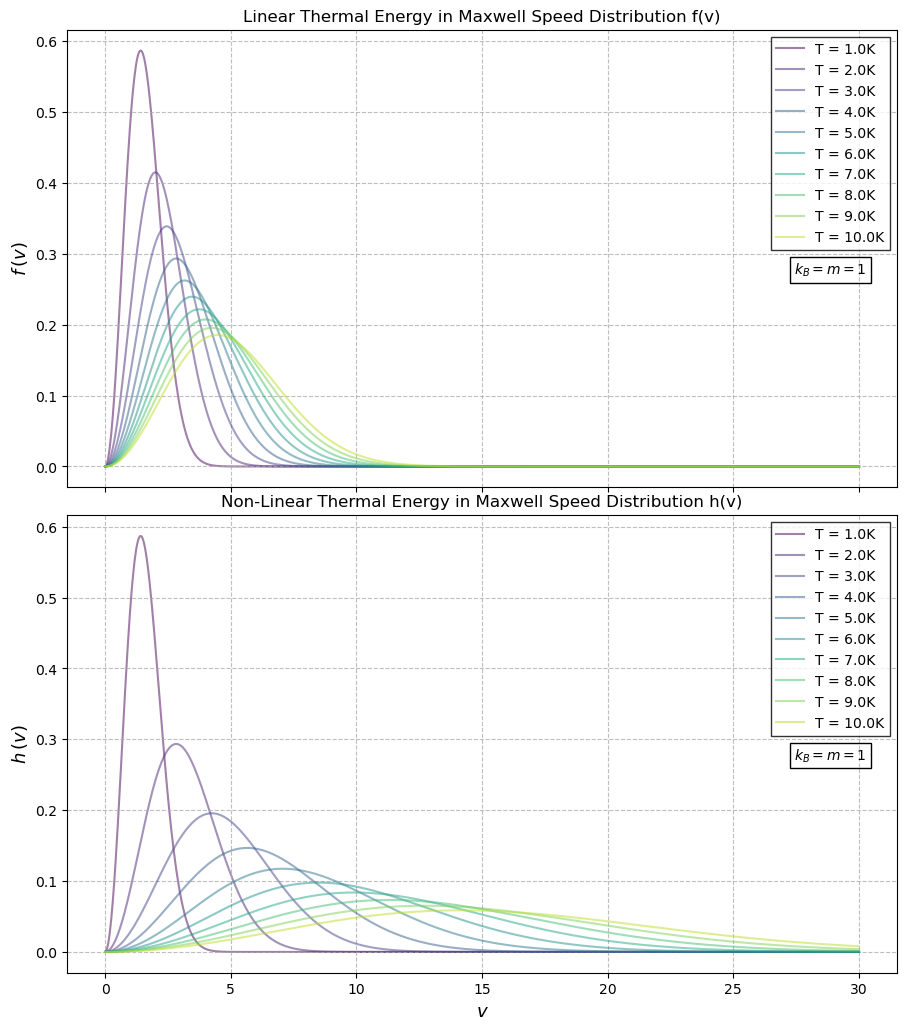

In [3]:
'''Constants'''
m = 1   #mass
kB = 1  #Boltzmann's constant

'''Range of temperatures [K]'''
temps = np.linspace(1, 10, 10)

'''Create figure'''
colors = plt.cm.viridis(np.linspace(0, 0.9, len(temps)))
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (9, 10), sharex = True)
fig.tight_layout(pad = 1)

'''First figure --> kT'''
ax1.set_ylabel('$f\,(v)$', fontsize = 13)
ax1.set_title('Linear Thermal Energy in Maxwell Speed Distribution f(v)')
ax1.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.75)
ax1.annotate('$k_B=m=1$', xy = (0.92, 0.475), xycoords = 'axes fraction', ha = 'center', va = 'center',
              bbox = dict(boxstyle = 'square', edgecolor = 'black', facecolor = 'none'))

'''Second figure --> kT^2'''
ax2.set_xlabel('$v$', fontsize = 13)
ax2.set_ylabel('$h\,(v)$', fontsize = 13)
ax2.set_title('Non-Linear Thermal Energy in Maxwell Speed Distribution h(v)')
ax2.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.75)
ax2.annotate('$k_B=m=1$', xy = (0.92, 0.475), xycoords = 'axes fraction', ha = 'center', va = 'center',
              bbox = dict(boxstyle = 'square', edgecolor = 'black', facecolor = 'none'))

'''Plot results'''
for i, T in enumerate(temps):
    v = np.linspace(0, 30, 1000)     #range of speeds
    fv, hv = f(v, m, T), h(v, m, T)  #MSD calculations
    ax1.plot(v, fv, color = colors[i], alpha = 0.5, zorder = i, label = f'T = {T}K')
    ax2.plot(v, hv, color = colors[i], alpha = 0.5, zorder = i, label = f'T = {T}K')

'''Create legends'''
legend1 = ax1.legend(loc = 'upper right', prop = {'size': 10}, fancybox = False)
frame1 = legend1.get_frame()
frame1.set_facecolor('white')
frame1.set_edgecolor('black')
frame1.set_linewidth(1)
legend2 = ax2.legend(loc = 'upper right', prop = {'size': 10}, fancybox = False)
frame2 = legend2.get_frame()
frame2.set_facecolor('white')
frame2.set_edgecolor('black')
frame2.set_linewidth(1)

'''Save figure'''
fig.savefig('c:/Users/Tucker Knaak/Downloads/MSD_Comparison_Plot.png', bbox_inches = 'tight')

#### This cell calculates the most probable, mean, and root-mean-square speeds for the MSD with $k_BT$ and $k_BT^2$ for both hydrogen ($H_2$) and nitrogen ($N_2$) molecules in the atmosphere.

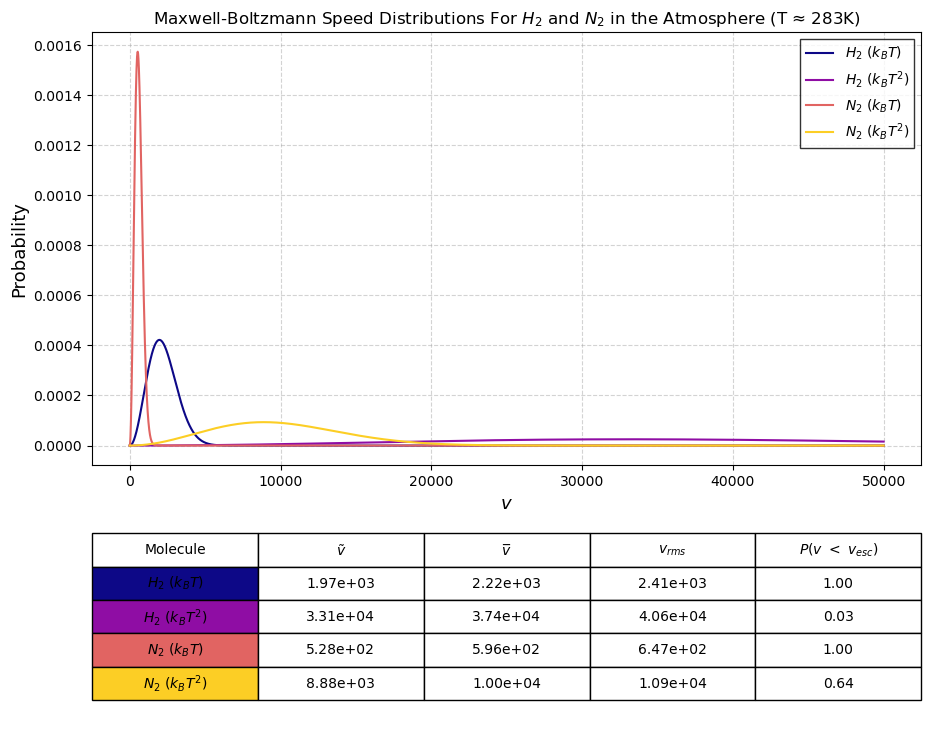

In [4]:
'''Constants'''
T = 283                 #average temperature of atmosphere [K]
kB = 1.38 * 10**-23     #Boltzmann's constant [J / K]
m_H2 = 2.016 * 10**-27  #mass of hydrogen molecule [kg]
m_N2 = 2.801 * 10**-26  #mass of nitrogen molecule [kg]
v_esc = 1.12 * 10**4    #escape velocity of earth [m / s]

'''Molecules and colors'''
molecules = [m_H2, m_H2, m_N2, m_N2]
labels = ['$H_2\ (k_BT)$', '$H_2\ (k_BT^2)$', '$N_2\ (k_BT)$', '$N_2\ (k_BT^2)$']
colors = plt.cm.plasma(np.linspace(0, 0.9, len(labels)))

'''Create figure and plot results'''
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (9, 7.5), gridspec_kw = {'height_ratios': [2, 1]})
fig.tight_layout(pad = 1)

'''First figure --> MSD plot'''
ax1.set_xlabel('$v$', fontsize = 13)
ax1.set_ylabel('Probability', fontsize = 13)
ax1.set_title('Maxwell-Boltzmann Speed Distributions For $H_2$ and $N_2$ in the Atmosphere (T \u2248 283K)')
ax1.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.5)
for i, m in enumerate(molecules):
    v = np.linspace(0, 5 * 10**4, 10**5)
    msd = f(v, m, T) if i % 2 == 0 else h(v, m, T)
    ax1.plot(v, msd, color = colors[i], label = labels[i])
legend1 = ax1.legend(loc = 'upper right', prop = {'size': 10}, fancybox = False)
frame1 = legend1.get_frame()
frame1.set_facecolor('white')
frame1.set_edgecolor('black')
frame1.set_linewidth(1)

'''Second figure --> Relevant speeds table'''
ax2.axis('off')
columns = ['Molecule', '$v\u0303$', '$v\u0305$', '$v_{rms}$', '$P(v\ <\ v_{esc})$']
table, cell_colors = [], []
for i, m in enumerate(molecules):
    most = np.sqrt(2 * kB * T / m) if i % 2 == 0 else np.sqrt(2 * kB * T**2 / m)
    mean = np.sqrt(8 * kB * T / (np.pi * m)) if i % 2 == 0 else np.sqrt(8 * kB * T**2 / (np.pi * m))
    rms = np.sqrt(3 * kB * T / m) if i % 2 == 0 else np.sqrt(3 * kB * T**2 / m)
    prob, _ = quad(f, 0, v_esc, args = (m, T)) if i % 2 == 0 else quad(h, 0, v_esc, args = (m, T))
    row = [labels[i], f'{most:.2e}', f'{mean:.2e}', f'{rms:.2e}', f'{prob:.2f}']
    table.append(row)
    cell_colors.append([colors[i], 'white', 'white', 'white', 'white'])
the_table = ax2.table(cellText = table, colLabels = columns, loc = 'center', cellLoc = 'center', cellColours = cell_colors)
the_table.scale(1, 2)

'''Save figure'''
fig.savefig('c:/Users/Tucker Knaak/Downloads/Atmosphere_MSD_Comparison.png', bbox_inches = 'tight')

#### This cell calculates the temperature of the molecules for $v_{rms}=v_{esc}$ as well as the fraction of thermal energy to kinetic energy in the atmosphere to determine if these molecules will be captured or will escape.

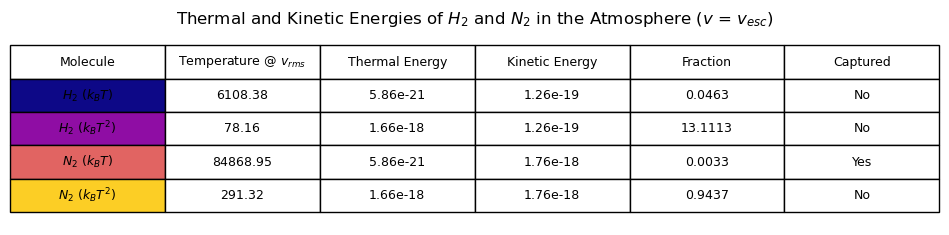

In [5]:
'''Create figure'''
fig, ax = plt.subplots(1, 1, figsize = (10, 2.5))
fig.tight_layout(pad = 1)
ax.axis('off')
ax.set_title('Thermal and Kinetic Energies of $H_2$ and $N_2$ in the Atmosphere ($v$ = $v_{esc}$)')

'''Plot results'''
columns = ['Molecule', 'Temperature @ $v_{rms}$', 'Thermal Energy', 'Kinetic Energy', 'Fraction', 'Captured']
table, cell_colors = [], []
for i, m in enumerate(molecules):
    temp = m * v_esc**2 / (3 * kB) if i % 2 == 0 else np.sqrt(m * v_esc**2 / (3 * kB))
    te = 1.5 * kB * T if i % 2 == 0 else 1.5 * kB * T**2
    ke = 0.5 * m * v_esc**2
    frac = te / ke
    captured = 'Yes' if frac <= 0.01 else 'No'
    row = [labels[i], f'{temp:.2f}', f'{te:.2e}', f'{ke:.2e}', f'{frac:.4f}', captured]
    table.append(row)
    cell_colors.append([colors[i], 'white', 'white', 'white', 'white', 'white'])
the_table = ax.table(cellText = table, colLabels = columns, loc = 'center', cellLoc = 'center', cellColours = cell_colors)
the_table.scale(1, 2)

'''Save figure'''
fig.savefig('c:/Users/Tucker Knaak/Downloads/Atmosphere_Escape_Comparison.png', bbox_inches = 'tight')